Fashion recognition using convolutional neural network

Goal: Classifying 10 different clothes 
Data: fashion mnist from keras datasets

Classes:
0:T-shirt/top
1:Trouser/pants
2:Pullover shirt
3:Dress
4:Coat
5:Sandal
6:Shirt
7:Sneaker
8:Bag
9:Ankle boot

In [52]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [83]:
# Fashion data from keras datasets
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the data for the input of the model
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

classes = ['T-shirt/top', 'Trouser/pants', 'Pullover shirt', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

0


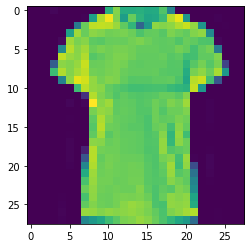

In [66]:
# Example of a data
plt.imshow(np.squeeze(training_images[0], axis=2))
print(training_labels[0])

In [55]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [56]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [57]:
history = model.fit(training_images, training_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 49s 814us/sample - loss: 0.4330 - accuracy: 0.8411
Epoch 2/5
60000/60000 [==============================] - 49s 813us/sample - loss: 0.2861 - accuracy: 0.8946
Epoch 3/5
60000/60000 [==============================] - 49s 811us/sample - loss: 0.2421 - accuracy: 0.9104
Epoch 4/5
60000/60000 [==============================] - 49s 812us/sample - loss: 0.2129 - accuracy: 0.9194
Epoch 5/5
60000/60000 [==============================] - 50s 841us/sample - loss: 0.1857 - accuracy: 0.9307


In [93]:
prediction = model.predict(test_images)
predicted_labels = [np.argmax(l) for l in prediction]

Prediction: Pullover shirt
Actual Class: Pullover shirt


Prediction: Trouser/pants
Actual Class: Trouser/pants


Prediction: Trouser/pants
Actual Class: Trouser/pants


Prediction: T-shirt/top
Actual Class: Shirt


Prediction: Trouser/pants
Actual Class: Trouser/pants




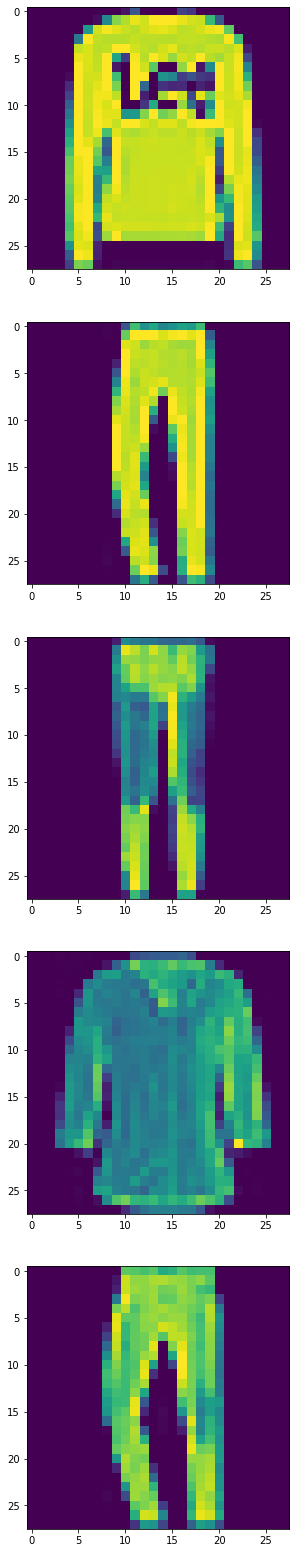

In [92]:
# Run the model on test set
n = 5
fig=plt.figure(figsize=(28, 28))
rows = n
columns = 1
for i in range(1, rows*columns+1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(np.squeeze(test_images[i], axis=2))
    print('Prediction:',classes[predicted_labels[i]])
    print('Actual Class:', classes[test_labels[i]])
    print('\n')